In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\maritza\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("bankingdata.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df["education"])
df["education"]=label_encoder.transform(df["education"])
label_encoder.fit(df["job"])
df["job"]=label_encoder.transform(df["job"])
label_encoder.fit(df["marital"])
df["marital"]=label_encoder.transform(df["marital"])
label_encoder.fit(df["default"])
df["default"]=label_encoder.transform(df["default"])
label_encoder.fit(df["housing"])
df["housing"]=label_encoder.transform(df["housing"])
label_encoder.fit(df["loan"])
df["loan"]=label_encoder.transform(df["loan"])
label_encoder.fit(df["contact"])
df["contact"]=label_encoder.transform(df["contact"])
label_encoder.fit(df["month"])
df["month"]=label_encoder.transform(df["month"])
label_encoder.fit(df["day_of_week"])
df["day_of_week"]=label_encoder.transform(df["day_of_week"])
label_encoder.fit(df["poutcome"])
df["poutcome"]=label_encoder.transform(df["poutcome"])
label_encoder.fit(df["y"])
df["y"]=label_encoder.transform(df["y"])


# Select your features (columns)

In [6]:
# import datetime
# df["birth_day"] = pd.DatetimeIndex(df['birth_date']).day
# df["birth_month"] = pd.DatetimeIndex(df['birth_date']).month
# df["birth_year"] = pd.DatetimeIndex(df['birth_date']).year
# df["club_join_year"]=pd.DatetimeIndex(df['club_join_date']).year
# df["club_join_month"]=pd.DatetimeIndex(df['club_join_date']).month
# df["club_join_day"]=pd.DatetimeIndex(df['club_join_date']).day

In [7]:
corr=df.corr()
coffi=abs(corr["y"])
coffi.sort_values(ascending=True)

loan              0.004909
month             0.006065
housing           0.011552
day_of_week       0.015967
job               0.025122
age               0.030399
marital           0.046203
cons.conf.idx     0.054878
education         0.057799
campaign          0.066357
default           0.099352
poutcome          0.129789
cons.price.idx    0.136211
contact           0.144773
previous          0.230181
emp.var.rate      0.298334
euribor3m         0.307771
pdays             0.324914
nr.employed       0.354678
duration          0.405274
y                 1.000000
Name: y, dtype: float64

In [8]:
df_selected=df

# Create a Train Test Split


Input variables:
Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [9]:
from matplotlib import pyplot
df_selected.plot(kind='box', subplots=True, layout = (5, 5),sharex =False, sharey =False, figsize = [10, 10])

pyplot.show()

#axs[0,0].boxplot(df)

<Figure size 1000x1000 with 25 Axes>

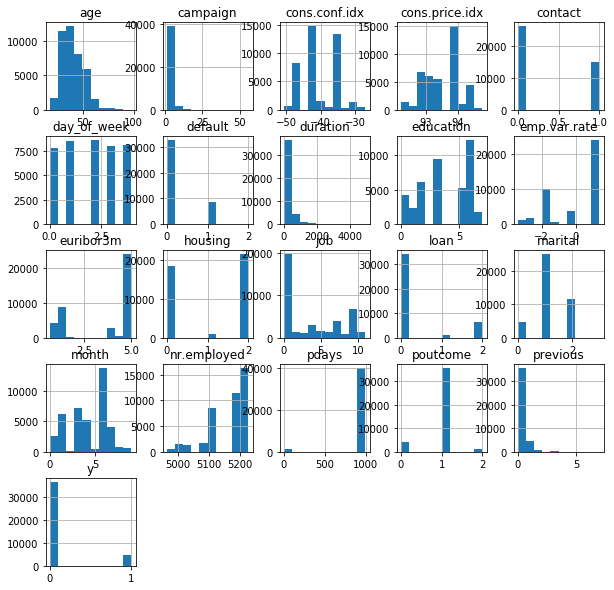

In [10]:
df_selected.hist(figsize = [10, 10])
pyplot.show()

#analysis: Duration and nr.employed Price Index seem to have the closest Gaussian Distribution

# Multivariate Plots

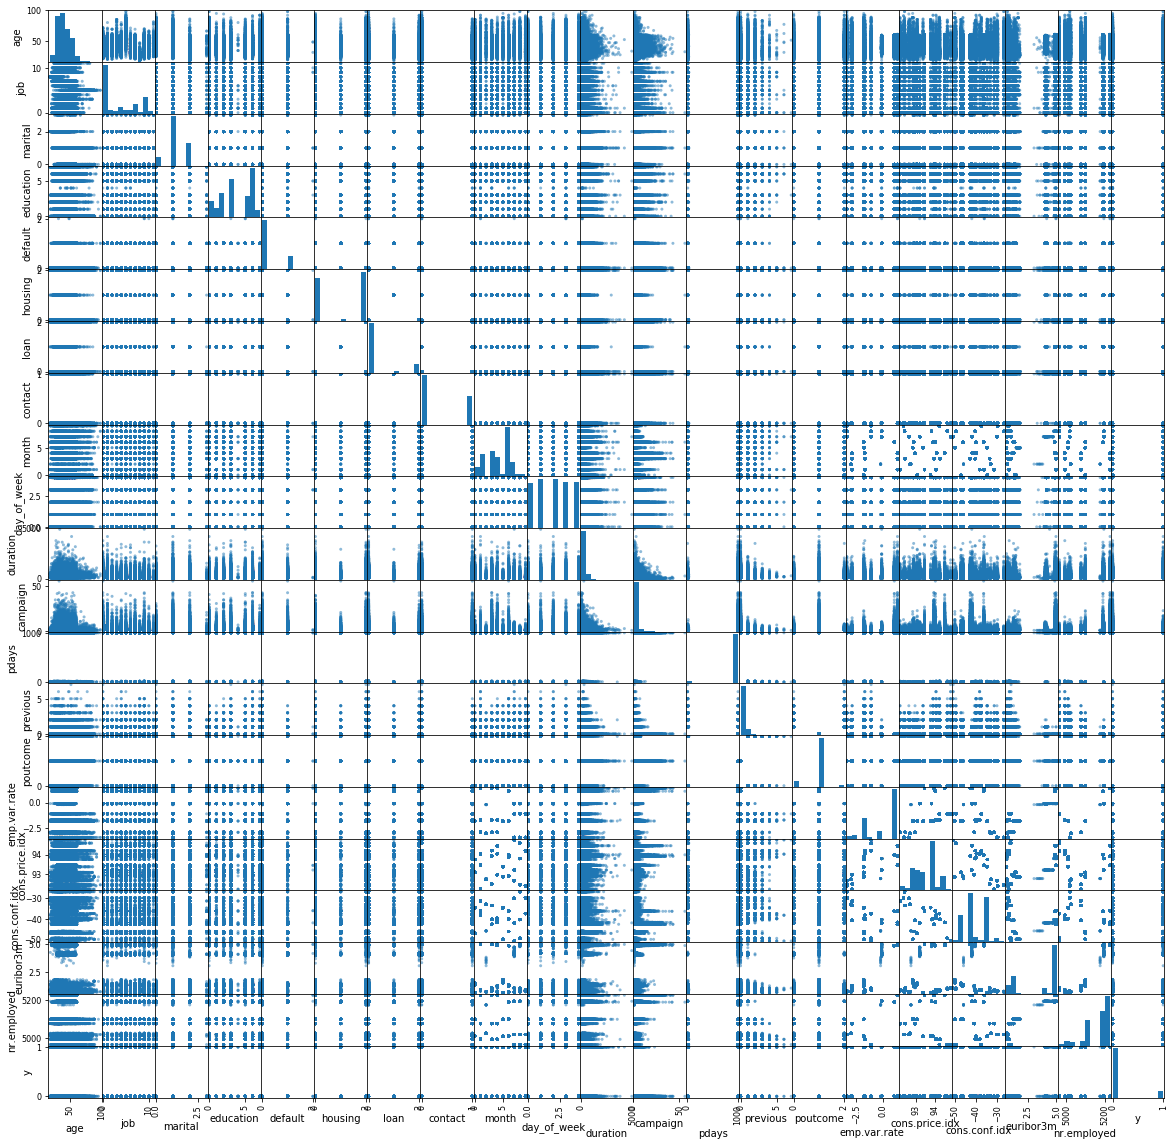

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_selected, figsize= [20,20])
pyplot.show()

# Create a Train Test Split

Use `koi_disposition` for the y values

In [12]:
deposit=df["y"]
feature=df_selected.drop(["y"],axis=1)


#.drop(["LS"],axis=1).drop(["ST"],axis=1).drop(["RS"],axis=1).drop(["LW"],axis=1).drop(["LF"],axis=1).drop(["CF"],axis=1).drop(["RF"],axis=1).drop(["RW"],axis=1).drop(["LAM"],axis=1).drop(["CAM"],axis=1).drop(["RAM"],axis=1).drop(["LM"],axis=1).drop(["LCM"],axis=1).drop(["CM"],axis=1).drop(["RCM"],axis=1).drop(["RM"],axis=1).drop(["LWB"],axis=1).drop(["LDM"],axis=1).drop(["CDM"],axis=1).drop(["RDM"],axis=1).drop(["RWB"],axis=1).drop(["LB"],axis=1).drop(["RB"],axis=1).drop(["value_euro"],axis=1).drop(["release_clause_euro"],axis=1)


In [13]:
X = feature
y = deposit


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2,stratify=y)

In [15]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25611,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1,-0.1,93.200,-42.0,4.120,5195.8
26010,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,-0.1,93.200,-42.0,4.120,5195.8
40194,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,-1.7,94.215,-40.3,0.870,4991.6
297,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
36344,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,-2.9,92.963,-40.8,1.262,5076.2


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Train the Model



In [22]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8989681335356601
Testing Data Score: 0.9004612770089827


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [29]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [50, 100, 200],
              'gamma': [0.00001, 0.00005, 0.0001, 0.0005],
              'kernel': ['linear','rbf']}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

C:\Users\80480\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] C=50, gamma=1e-05, kernel=linear ................................


In [27]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 100, 'gamma': 0.0005, 'kernel': 'rbf'}
0.07692307692307693


# Save the Model

In [20]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'svc.sav'
joblib.dump(model, filename)

['svc.sav']

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
columns = []
for column, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train_scaled, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    columns.append(column)
    print('%s: %f (%f)' % (column, cv_results.mean(), cv_results.std()))